# Setup

In [1]:
############################################
##### decide which real machine to use #####
############################################
backend_name = 'ibm_kawasaki'

In [2]:
############################
##### import libraries #####
############################
import icepp
# from sample.onestepSim_LBNL import runQuantum1
# from sample.twostepSim_LBNL import runQuantum2
from pytket.extensions.qiskit import IBMQBackend, AerBackend
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np


#########################################
##### set IBM-Q account and backend #####
#########################################
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-utokyo',group='internal',project='icepp')

# backend = provider.get_backend(backend_name)
sim_b = AerBackend() #全結合
# dev_b = IBMQBackend(backend_name=backend_name, hub='ibm-q-utokyo',group='internal',project='icepp') #本物の実機

# ①Original Cirucuit

In [3]:
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram #for plotting histogram
import numpy as np # for mathematical computation
import matplotlib.pyplot as plt #for plotting graph
%matplotlib inline

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
sys.path.append('../qiskit_legacy')
sys.path.append('../qiskit_code')

import QuantumPartonShower as qps
import QuantumPartonShower_ReM as qpsc
import plotting as pl
import matplotlib

from PaperPlots import MakeObservables as mo

import QuantumPartonShower_ReM_2step_hardcode as qps_rhs


eps= 0.001
g_1= 2
g_2= 1
initialParticles= ['100'] # f1

shots= 10000
N= 1

qps0= qps.QuantumPartonShower(N, 1) # for g12= 0
qps1= qps.QuantumPartonShower(N, 1) # for g12= 1

qc0, qubits0= qps0.createCircuit(eps, g_1, g_2, 0, initialParticles)
qc1, qubits1= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)


print('Qubits: ' + str(qc0.num_qubits))
print('Gates: ' + str(qc0.count_ops()))

t1= time.time()
counts0= qps0.simulate('qasm', shots=shots)
t2= time.time()
counts1= qps1.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 0: ' + str(t2-t1))
print('Time to simulate withg g12= 1: ' + str(t3-t2))

qc = qc0

Number of emissions: 1
log(theta_max): -5.180816459236603
Number of emissions: 1
log(theta_max): -1.7269388197455342
Number of emissions: 2
log(theta_max): -1.7269388197455342
Number of emissions: 1
log(theta_max): -3.4538776394910684
generated circuit on 11 qubits
generated circuit on 11 qubits
Qubits: 20
Gates: OrderedDict([('ccx', 149), ('x', 126), ('cry', 17), ('cx', 7), ('ch', 1)])

Time to simulate withg g12= 0: 4.295262575149536
Time to simulate withg g12= 1: 4.205461263656616


In [5]:
qc.draw('mpl', fold=200)

In [6]:
####################################
#### count the number of CNOTs #####
####################################
qc.count_ops()

OrderedDict([('ccx', 149),
             ('x', 126),
             ('measure', 20),
             ('cry', 17),
             ('cx', 7),
             ('ch', 1)])

In [7]:
###########################################
##### count depth of original circuit #####
###########################################
qc1 = qc
qc.depth()# 1から始めてmeasurementは含めないで数えてくれる

173

In [8]:
# #####################
# ##### n-trotter #####
# #####################
# #パラメータ
# num_site = 4 #サイト数
# j_coupling = 1 #相互作用J
# h_ext = 3 # 横磁場h
# # step_max = 100 # 鈴木-トロッター分解の数
# t_max = 3 #時間発展させる時間
# # dt = t_max/step_max # 各ステップの時間\Delta t

# #量子回路の作成
# qr = QuantumRegister(num_site,'qr') #量子レジスタ
# cr = ClassicalRegister(num_site,'cr') #古典レジスタ
# qc = QuantumCircuit(qr,cr) #量子回路

# # 鈴木-トロッター分解n回分
# num_steps = 3
# dt = t_max/num_steps

# #exp(-iH_{ZZ}\Delta t)
# for step in range(num_steps):
#     for i in range(num_site-1):

#         qc.cx(qr[i],qr[i+1])
#         qc.rz(-2*j_coupling*dt, qr[i+1])
#         qc.cx(qr[i],qr[i+1])

#         qc.barrier() #見た目をよくする

# #exp(-iH_{X}\Delta t)    
# for i in range(num_site):
#     qc.rx(-2*h_ext*dt,qr[i])

# #qc.barrier()
# qc.draw('mpl')
# # qc.draw('mpl',filename= 'tfim_st.pdf')

In [9]:
# ####################################
# #### count the number of CNOTs #####
# ####################################
# qc.count_ops()

In [10]:
# ###########################################
# ##### count depth of original circuit #####
# ###########################################
# qc1 = qc
# qc.depth()# 1から始めてmeasurementは含めないで数えてくれる

In [11]:
# simulator = Aer.get_backend('qasm_simulator') # シミュレータ
# num_shots = 1000 #測定回数

# #ジョブの実行
# job = execute(qc, simulator, shots=num_shots) #execute
# result = job.result() # obtain results
# counts = result.get_counts(qc) 

# #磁化の計算
# mag = 0
# for bit_string, count in counts.items():
#     obs = 0
#     for j in range(num_site):
#         obs += (-1)**int(bit_string[j])
#     mag += obs*count/num_shots/num_site

In [12]:
# print(mag)

In [13]:
# #パラメータ
# num_site = 4 #サイト数
# j_coupling = 1 #相互作用J
# h_ext = 3 # 横磁場h
# step_max = 100 # 鈴木-トロッター分解の数
# t_max = 3 #時間発展させる時間
# dt = t_max/step_max # 各ステップの時間\Delta t

# simulator = Aer.get_backend('qasm_simulator') # シミュレータ
# num_shots = 1000 #測定回数

# #量子、古典レジスタ
# qr = QuantumRegister(num_site)
# cr = ClassicalRegister(num_site)

# #時間発展用の量子回路
# qc_main = QuantumCircuit(qr,cr)

# #測定用の回路
# qc_meas = QuantumCircuit(qr,cr)
# qc_meas.measure(qr,cr)

# time_list_qiskit = [] #時刻のリスト
# mag_list_qiskit = [] #磁化のリスト

# #鈴木-トロッター分解
# for step in range(1,step_max+1):
#     #exp(-iH_{ZZ}\Delta t)
#     for i in range(num_site-1):
        
#         qc_main.cx(qr[i],qr[i+1])
#         qc_main.rz(-2*j_coupling*dt, qr[i+1])
#         qc_main.cx(qr[i],qr[i+1])

#     #exp(-iH_{X}\Delta t)    
#     for i in range(num_site):
#         qc_main.rx(-2*h_ext*dt,qr[i])
        
#     #測定用の回路をくっつける
#     qc_total = qc_main.combine(qc_meas)    
    
#     #ジョブの実行
#     job = execute(qc_total, simulator, shots=num_shots) #execute
#     result = job.result() # obtain results
#     counts = result.get_counts(qc_total) 
    
#     #磁化の計算
#     mag = 0
#     for bit_string, count in counts.items():
        
#         obs = 0
#         for j in range(num_site):
#             obs += (-1)**int(bit_string[j])
#         mag += obs*count/num_shots/num_site
    
#     time_list_qiskit.append(dt*step) #append time to the list of time
#     mag_list_qiskit.append(mag) #append magnetization to the list of magnetizations

In [14]:
# mag_list_ed = [(1+0j), (0.983529115593093+0j), (0.9348062523161028+0j), (0.8558518621626073+0j), (0.7498783958964582+0j), (0.6210839741070684+0j), (0.4744085698971666+0j), (0.3152832065575626+0j), (0.1493957240723367+0j), (-0.01751489419589597+0j), (-0.17983588370117287+0j), (-0.3322389914636137+0j), (-0.46983201767863103+0j), (-0.5883124860658533+0j), (-0.6841239613517429+0j), (-0.7546054407998797+0j), (-0.7981161282874281+0j), (-0.8141147443258616+0j), (-0.803175658616978+0j), (-0.7669328319988528+0j), (-0.7079543489780386+0j), (-0.6295618339052357+0j), (-0.5356170960741481+0j), (-0.43030095085585607+0j), (-0.3179060657281656+0j), (-0.20265833651572585+0j), (-0.08857228671355206+0j), (0.020661905590963814+0j), (0.12176681104917475+0j), (0.21194927450829706+0j), (0.28895998395859446+0j), (0.3511415166245457+0j), (0.3974611505314153+0j), (0.42752260263743685+0j), (0.4415514850468917+0j), (0.44035229325145275+0j), (0.42523892876308067+0j), (0.39794456530245215+0j), (0.3605188367954608+0j), (0.31522034569014235+0j), (0.26441072793043396+0j), (0.21045398969481524+0j), (0.15562276148860388+0j), (0.10201237269349056+0j), (0.05146440856088165+0j), (0.0055030809213749005+0j), (-0.03471077262896741+0j), (-0.0684030710441568+0j), (-0.09518403993457397+0j), (-0.11502028153257884+0j), (-0.12818609525713587+0j), (-0.13520250531759356+0j), (-0.13677411530079228+0j), (-0.13373272164453084+0j), (-0.1269927713118472+0j), (-0.11751843045966362+0j), (-0.10629705685990526+0j), (-0.09431106240468656+0j), (-0.08250067785449322+0j), (-0.07171403088651288+0j), (-0.0626470508628275+0j), (-0.05578198055310041+0j), (-0.051337463672524175+0j), (-0.049243609648132014+0j), (-0.04915160577807076+0j), (-0.05048024061832501+0j), (-0.05249316386015744+0j), (-0.05439339415991053+0j), (-0.05541774048036843+0j), (-0.054914615029685254+0j), (-0.05239392574314326+0j), (-0.04754570835399502+0j), (-0.04023241369626279+0j), (-0.030465788581933426+0j), (-0.018381336424924462+0j), (-0.004220997225332708+0j), (0.011671046323291002+0j), (0.02884157884767699+0j), (0.04671865945641654+0j), (0.0646099569270626+0j), (0.08171890620398714+0j), (0.09718379225807494+0j), (0.11013821163599624+0j), (0.11978490086424853+0j), (0.1254706709574525+0j), (0.12674937388013657+0j), (0.1234225332211644+0j), (0.11555248466780063+0j), (0.10344888728675843+0j), (0.08763449188784166+0j), (0.06879879497172225+0j), (0.04774824255375334+0j), (0.025359466027473156+0j), (0.002538758446618758+0j), (-0.01981206993778392+0j), (-0.04082519608028863+0j), (-0.05969370923146457+0j), (-0.0756970868480101+0j), (-0.08822492714213223+0j), (-0.09679756557562055+0j)]
# plt.plot(np.linspace(0,3,100),mag_list_ed,label='ED')
# plt.plot(time_list_qiskit, mag_list_qiskit, ".",label='Qiskit')
# plt.title(f'Dynamics of transverse Ising model ($N=${num_site}, $J=${j_coupling}, $h=${h_ext})')
# plt.xlabel('time')
# plt.ylabel('magnetization')
# plt.legend()
# # plt.savefig('tfim_time_evolution.pdf')
# plt.show()

In [15]:
# ###################################################
# ##### input circuit you want to optimize here #####
# ###################################################
# qc = runQuantum1(gLR=1,dophisplit=1)#circuit_LBNL1
# qc1 = qc
# qc1.draw("mpl")

In [16]:
# ####################################
# #### count the number of CNOTs #####
# ####################################
# qc1.count_ops()

In [17]:
# ###########################################
# ##### count depth of original circuit #####
# ###########################################
# qc1.depth()# 1から始めてmeasurementは含めないで数えてくれる

In [18]:
# ###################################################
# ##### input circuit you want to optimize here #####
# ###################################################
# qc = runQuantum2(gLR=1,dophisplit=1)#circuit_LBNL2
# qc2 = qc
# qc2.draw("mpl")

In [19]:
# #####################################
# ##### count the number of CNOTs #####
# #####################################
# qc2.count_ops()

In [20]:
# ###########################################
# ##### count depth of original circuit #####
# ###########################################
# qc2.depth()# 1から始めてmeasurementは含めないで数えてくれる

### ②Original Cirucuit decomposed

In [21]:
######################################
##### decompose original circuit #####
######################################
qc3 = qc1.decompose()

In [22]:
##########################################
##### too long so do not draw ciruit #####
##########################################
qc3.draw("mpl", fold=200)

In [23]:
#####################################
##### count the number of CNOTs #####
#####################################
qc3.count_ops()

OrderedDict([('cx', 936),
             ('t', 597),
             ('tdg', 448),
             ('h', 300),
             ('u3', 126),
             ('ry', 34),
             ('measure', 20),
             ('s', 1),
             ('sdg', 1)])

In [24]:
######################################################
##### count depth of decomposed original circuit #####
######################################################
qc3.depth()

1230

In [25]:
# ######################################
# ##### decompose original circuit #####
# ######################################
# qc4_1 = qc2.decompose()
# qc4_2 = qc4_1.decompose()

In [26]:

# ##########################################
# ##### too long so do not draw ciruit #####
# ##########################################
# qc4_2.draw("mpl", fold=130)

In [27]:
# #####################################
# ##### count the number of CNOTs #####
# #####################################
# qc4_1.count_ops()

In [28]:
# #####################################
# ##### count the number of CNOTs #####
# #####################################
# qc4_2.count_ops()

In [29]:
# ######################################################
# ##### count depth of decomposed original circuit #####
# ######################################################
# qc4_2.depth()

In [30]:
# ################################
# ##### make example circuit #####
# ################################
# qc = QuantumCircuit(4)

# qc.cx(0,1)
# qc.cx(2,3)
# qc.cx(1,2)
# qc.h(1)
# qc.cx(1,2)
# qc.cx(0,1)
# qc.cx(2,3)

# qc5 = qc
# qc5.draw('mpl')

In [31]:
# #####################################
# ##### count the number of CNOTs #####
# #####################################
# qc5.count_ops()

In [32]:
# ##########################################
# ##### count depth of example circuit #####
# ##########################################
# qc5.depth()

# ③AQCEL circuit optimization

In [33]:
#######################
##### apply aqcel #####
#######################
test = qc3
aqcel_results_cc = icepp.pass_manager(test, level=2, backend_tket=sim_b, shots=1024, measure_type='cc').auto_manager()

In [34]:
#################################
##### depth of removed CNOT #####
#################################
depth_ls = aqcel_results_cc[2]
print(f'number of reduced CNOTs: {len(depth_ls)}')  #2stepなら122になってほしい #元のcircuitのCNOTが155でAQCEL後には81なので74が出力されれば正解
print(f'depth list of removed CNOTs: {depth_ls}')

number of reduced CNOTs: 821
depth list of removed CNOTs: [2, 3, 4, 5, 7, 9, 12, 13, 13, 14, 16, 18, 20, 21, 23, 25, 27, 29, 30, 32, 35, 37, 39, 41, 43, 44, 44, 44, 44, 44, 46, 48, 50, 51, 53, 55, 57, 59, 61, 62, 64, 67, 68, 68, 68, 70, 72, 73, 75, 75, 77, 79, 81, 82, 84, 85, 87, 89, 91, 93, 94, 94, 96, 98, 100, 102, 104, 106, 108, 110, 111, 113, 113, 115, 117, 119, 120, 122, 122, 124, 126, 128, 130, 132, 133, 135, 137, 139, 141, 143, 144, 146, 148, 150, 152, 154, 155, 157, 157, 159, 161, 163, 164, 166, 166, 168, 170, 172, 174, 176, 177, 179, 181, 183, 185, 187, 188, 190, 192, 194, 196, 198, 199, 201, 201, 203, 205, 207, 208, 210, 210, 212, 214, 216, 218, 220, 221, 223, 225, 227, 229, 231, 232, 234, 237, 239, 241, 243, 244, 246, 246, 248, 250, 252, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 257, 259, 260, 262, 262, 262, 262, 262, 262, 262, 262, 266, 271, 273, 275, 279, 286, 288, 290, 292, 293, 295, 297, 299, 301, 303, 304, 306, 308, 310, 312, 314, 315, 3

In [35]:
############################
##### depth CNOTs exit #####
############################
depth_cnot = aqcel_results_cc[4]
print(len(depth_cnot))#元のcircuitのCNOTの数を表すので155が出力されれば正解
print(depth_cnot)

936
[2, 3, 4, 5, 7, 9, 12, 13, 13, 14, 16, 18, 20, 21, 23, 25, 27, 29, 30, 32, 35, 37, 39, 41, 43, 44, 44, 44, 44, 44, 46, 48, 50, 51, 53, 55, 57, 59, 61, 62, 64, 67, 68, 68, 68, 70, 72, 73, 75, 75, 77, 79, 81, 82, 84, 85, 87, 89, 91, 93, 94, 94, 96, 98, 100, 102, 104, 106, 108, 110, 111, 113, 113, 115, 117, 119, 120, 122, 122, 124, 126, 128, 130, 132, 133, 135, 137, 139, 141, 143, 144, 146, 148, 150, 152, 154, 155, 157, 157, 159, 161, 163, 164, 166, 166, 168, 170, 172, 174, 176, 177, 179, 181, 183, 185, 187, 188, 190, 192, 194, 196, 198, 199, 201, 201, 203, 205, 207, 208, 210, 210, 212, 214, 216, 218, 220, 221, 223, 225, 227, 229, 231, 232, 234, 237, 239, 241, 243, 244, 246, 246, 248, 250, 252, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 257, 259, 260, 262, 262, 262, 262, 262, 262, 262, 262, 264, 266, 268, 269, 271, 271, 273, 275, 277, 279, 281, 282, 284, 286, 288, 290, 292, 293, 295, 297, 299, 301, 303, 304, 306, 308, 310, 312, 314, 315, 317, 320, 322, 

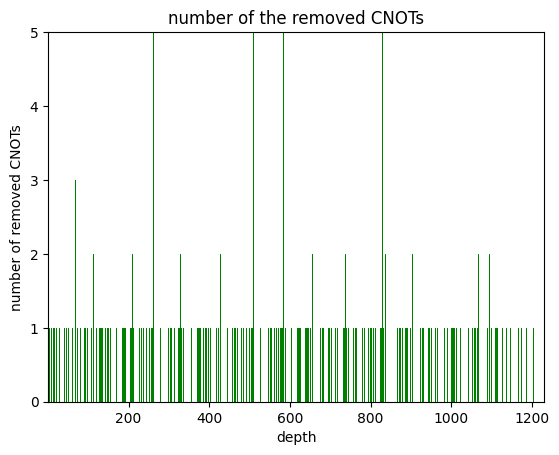

In [36]:
##########################################
##### graph of depth of removed CNOT #####
##########################################

max_depth =  test.depth()
x = np.arange(max_depth + 1) # 1 to maximum depth
y = np.zeros(max_depth + 1) # initial count is zero
for n in depth_ls:
    y[n] += 1


plt.bar(x, y, color = 'green')
plt.xlim(0.5, max_depth + 0.5)
plt.ylim(0, 5)
#plt.xticks([0, 5, 10], ['c0', 'c6', 'c10])
#plt.yticks([0, 5, 10], ['c0', 'c6', 'c10])
# plt.minorticks_on()
# plt.xscale('log')
# plt.yscale('log')
plt.title('number of the removed CNOTs')
plt.xlabel('depth')
plt.ylabel('number of removed CNOTs')
# plt.grid()
#plt.legend()
#plt.savefig("figures/figure.pdf")
plt.show()

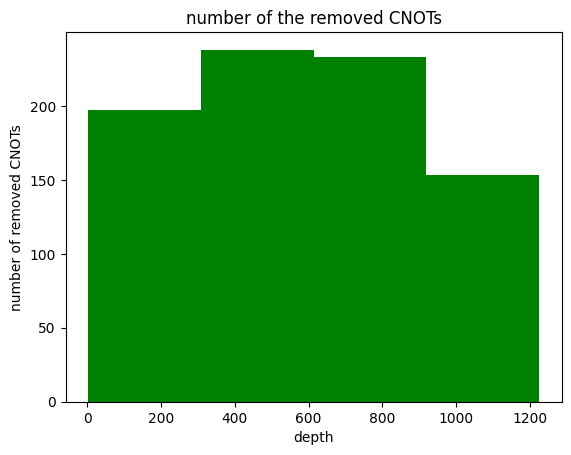

In [37]:
##########################################
##### graph of depth of removed CNOT #####
##########################################
x = depth_ls


plt.hist(x, bins = 4, color = 'green')
# plt.xlim(0.5, max_depth + 0.5)
# plt.ylim(0, 5)
#plt.xticks([0, 5, 10], ['c0', 'c6', 'c10])
#plt.yticks([0, 5, 10], ['c0', 'c6', 'c10])
# plt.minorticks_on()
# plt.xscale('log')
# plt.yscale('log')
plt.title('number of the removed CNOTs')
plt.xlabel('depth')
plt.ylabel('number of removed CNOTs')
# plt.grid()
#plt.legend()
#plt.savefig("figures/figure.pdf")
plt.show()

number of removed CNOTs = [11.  9. 12.  9. 11. 11.  8. 11.  9.  9. 10.  9. 10.  9.  8. 23. 13.  5.
  9.  8. 10. 33.  4.  9.  9.  9. 23.  4.  7.  9. 10. 35.  5.  6.  9. 10.
 36.  3.  6.  8. 11. 24.  4.  6.  9.  9. 30. 12.  5.  9.  8. 36.  7.  4.
  9.  8. 10. 21.  5.  8.  9. 26.  9.  9. 11.  9. 11.  3. 10.  7.  2.  6.
  5.  6.  7.  5.  2.]


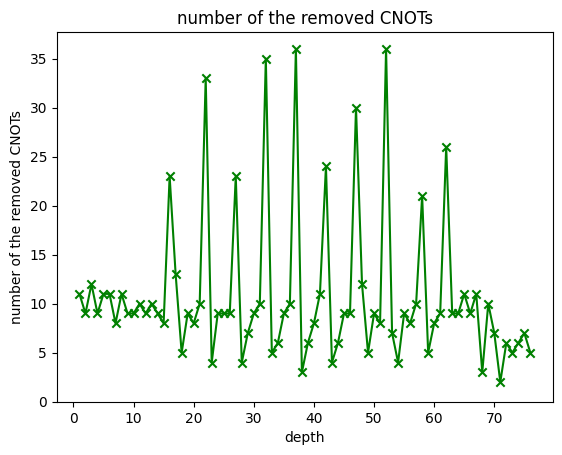

In [38]:
##########################################
##### graph of depth of removed CNOT #####
##########################################

# 64,16
width = 16  # width of histogram

# example:
# >>> np.zeros(5)
# array([ 0.,  0.,  0.,  0.,  0.])

num_cnot_rem = np.zeros(max_depth//width + 1) # array of 6 zeros
for n in range(max_depth): # n = 0 - 5
    if n == (max_depth//width + 1): # max_depth//width + 1 = 256//50 + 1 =  6
        break
    else:
        for m in range(width*n + 1 , width*(n+1) + 1):
            num_cnot_rem[n] += depth_ls.count(m)
            
            
print(f'number of removed CNOTs = {num_cnot_rem}' )
x = np.arange(1, max_depth//width + 2)[:-1] # x = [1 2 3 4 5]
y = num_cnot_rem[:-1]



plt.plot(x, y, color = 'green')
plt.scatter(x, y, marker = 'x', color = 'green')
# plt.xlim(0.5, 4.5)
plt.ylim(0)
# plt.xticks(x , ['1-64', '65-128', '129-192', '195-256'])
# plt.xticks(x , ['1-16', '17-32', '33-48', '49-64', '65-80', '81-96', '97-112', '113-128', '129-144', '145-160', '161-176', '177-192', '193-208', '209-224', '225-240', '240-256'], rotation = 45)
#plt.yticks([0, 5, 10], ['c0', 'c6', 'c10])
# plt.minorticks_on()
# plt.xscale('log')
# plt.yscale('log')
plt.title('number of the removed CNOTs')
plt.xlabel('depth')
plt.ylabel('number of the removed CNOTs')
# plt.grid()
#plt.legend()
#plt.savefig("figures/figure.pdf")
plt.show()

number of original CNOTs = [11.  9. 12.  9. 11. 11.  8. 11.  9.  9. 10.  9. 10.  9.  8. 23. 17.  9.
  9.  8. 10. 36.  9.  9.  9.  9. 24. 10.  8.  9. 10. 36.  9.  9.  9. 10.
 36. 10.  9.  8. 11. 24.  9.  9.  9.  9. 30. 16.  9.  9.  8. 36. 11.  8.
  9.  8. 10. 24. 11.  8.  9. 26.  9.  9. 11.  9. 12.  8. 12.  8.  9. 10.
  9. 10.  9. 12.  5.]


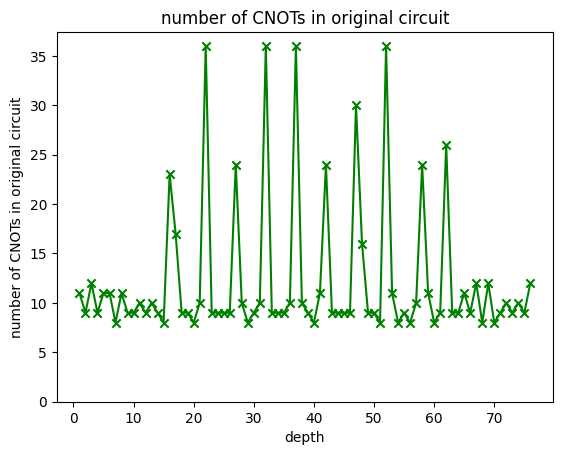

In [39]:
#################################
##### distribution of CNOTs #####
#################################

# 64,16
width = 16  # width of histogram

# example:
# >>> np.zeros(5)
# array([ 0.,  0.,  0.,  0.,  0.])

num_cnot_ori = np.zeros(max_depth//width + 1) # array of 6 zeros
for n in range(max_depth): # n = 0 - 5
    if n == (max_depth//width + 1): # max_depth//width + 1 = 256//50 + 1 =  6
        break
    else:
        for m in range(width*n + 1 , width*(n+1) + 1):
            num_cnot_ori[n] += depth_cnot.count(m)
            
            
print(f'number of original CNOTs = {num_cnot_ori}')
x = np.arange(1, max_depth//width + 2)[:-1] # x = [1 2 3 4 5]
y = num_cnot_ori[:-1]



plt.plot(x, y, color = 'green')
plt.scatter(x, y, marker = 'x', color = 'green')
# plt.xlim(0.5, 4.5)
plt.ylim(0)
# plt.xticks(x , ['1-64', '65-128', '129-192', '195-256'])
# plt.xticks(x , ['1-16', '17-32', '33-48', '49-64', '65-80', '81-96', '97-112', '113-128', '129-144', '145-160', '161-176', '177-192', '193-208', '209-224', '225-240', '240-256'], rotation = 45)
#plt.yticks([0, 5, 10], ['c0', 'c6', 'c10])
# plt.minorticks_on()
# plt.xscale('log')
# plt.yscale('log')
plt.title('number of CNOTs in original circuit')
plt.xlabel('depth')
plt.ylabel('number of CNOTs in original circuit')
# plt.grid()
#plt.legend()
#plt.savefig("figures/figure.pdf")
plt.show()

number of removed CNOTs = [11.  9. 12.  9. 11. 11.  8. 11.  9.  9. 10.  9. 10.  9.  8. 23. 13.  5.
  9.  8. 10. 33.  4.  9.  9.  9. 23.  4.  7.  9. 10. 35.  5.  6.  9. 10.
 36.  3.  6.  8. 11. 24.  4.  6.  9.  9. 30. 12.  5.  9.  8. 36.  7.  4.
  9.  8. 10. 21.  5.  8.  9. 26.  9.  9. 11.  9. 11.  3. 10.  7.  2.  6.
  5.  6.  7.  5.  2.]
number of original CNOTs = [11.  9. 12.  9. 11. 11.  8. 11.  9.  9. 10.  9. 10.  9.  8. 23. 17.  9.
  9.  8. 10. 36.  9.  9.  9.  9. 24. 10.  8.  9. 10. 36.  9.  9.  9. 10.
 36. 10.  9.  8. 11. 24.  9.  9.  9.  9. 30. 16.  9.  9.  8. 36. 11.  8.
  9.  8. 10. 24. 11.  8.  9. 26.  9.  9. 11.  9. 12.  8. 12.  8.  9. 10.
  9. 10.  9. 12.  5.]


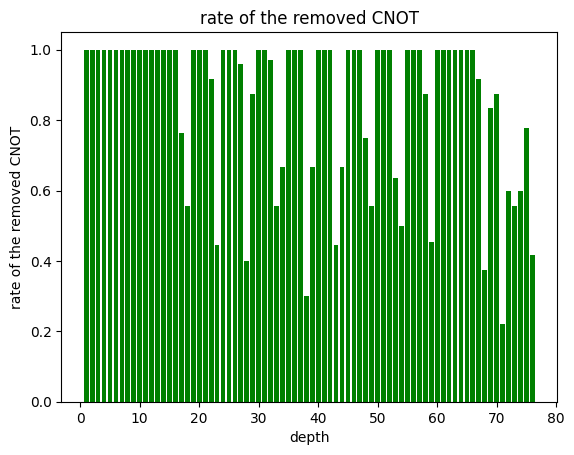

In [40]:
#########################################
##### graph of rate of removed CNOT #####
#########################################

width = 16 # width of histogram

# example:
# >>> np.zeros(5)
# array([ 0.,  0.,  0.,  0.,  0.])

num_cnot_ori = np.zeros(max_depth//width + 1) # array of 6 zeros
num_cnot_rem = np.zeros(max_depth//width + 1) # array of 6 zeros
for n in range(max_depth): # n = 0 - 5
    if n == (max_depth//width + 1): # max_depth//width + 1 = 256//50 + 1 =  6
        break
    else:
        for m in range(width*n + 1 , width*(n+1) + 1):
            num_cnot_ori[n] += depth_cnot.count(m)
            num_cnot_rem[n] += depth_ls.count(m)
            
            
print(f'number of removed CNOTs = {num_cnot_rem}' )
print(f'number of original CNOTs = {num_cnot_ori}')
x = np.arange(1, max_depth//width + 2)[:-1] # x = [1 2 3 4 5]
y = num_cnot_rem[:-1] / num_cnot_ori[:-1]



plt.bar(x, y, color = 'green')
# plt.xlim(0.5, max_depth + 0.5)
# plt.ylim(0, 1)
# plt.xticks(x , ['1-64', '65-128', '129-192', '195-256'])
# plt.xticks(x , ['1-16', '17-32', '33-48', '49-64', '65-80', '81-96', '97-112', '113-128', '129-144', '145-160', '161-176', '177-192', '193-208', '209-224', '225-240', '240-256'], rotation = 45)
#plt.yticks([0, 5, 10], ['c0', 'c6', 'c10])
# plt.minorticks_on()
# plt.xscale('log')
# plt.yscale('log')
plt.title('rate of the removed CNOT')
plt.xlabel('depth')
plt.ylabel('rate of the removed CNOT')
# plt.grid()
#plt.legend()
#plt.savefig("figures/figure.pdf")
plt.show()

number of removed CNOTs = [11.  9. 12.  9. 11. 11.  8. 11.  9.  9. 10.  9. 10.  9.  8. 23. 13.  5.
  9.  8. 10. 33.  4.  9.  9.  9. 23.  4.  7.  9. 10. 35.  5.  6.  9. 10.
 36.  3.  6.  8. 11. 24.  4.  6.  9.  9. 30. 12.  5.  9.  8. 36.  7.  4.
  9.  8. 10. 21.  5.  8.  9. 26.  9.  9. 11.  9. 11.  3. 10.  7.  2.  6.
  5.  6.  7.  5.  2.]
number of original CNOTs = [11.  9. 12.  9. 11. 11.  8. 11.  9.  9. 10.  9. 10.  9.  8. 23. 17.  9.
  9.  8. 10. 36.  9.  9.  9.  9. 24. 10.  8.  9. 10. 36.  9.  9.  9. 10.
 36. 10.  9.  8. 11. 24.  9.  9.  9.  9. 30. 16.  9.  9.  8. 36. 11.  8.
  9.  8. 10. 24. 11.  8.  9. 26.  9.  9. 11.  9. 12.  8. 12.  8.  9. 10.
  9. 10.  9. 12.  5.]


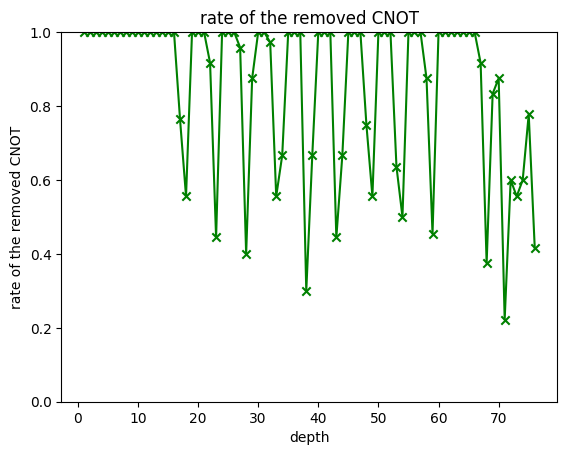

In [41]:
#########################################
##### graph of rate of removed CNOT #####
#########################################

# 64,16
width = 16  # width of histogram

# example:
# >>> np.zeros(5)
# array([ 0.,  0.,  0.,  0.,  0.])

num_cnot_ori = np.zeros(max_depth//width + 1) # array of 6 zeros
num_cnot_rem = np.zeros(max_depth//width + 1) # array of 6 zeros
for n in range(max_depth): # n = 0 - 5
    if n == (max_depth//width + 1): # max_depth//width + 1 = 256//50 + 1 =  6
        break
    else:
        for m in range(width*n + 1 , width*(n+1) + 1):
            num_cnot_ori[n] += depth_cnot.count(m)
            num_cnot_rem[n] += depth_ls.count(m)
            
            
print(f'number of removed CNOTs = {num_cnot_rem}' )
print(f'number of original CNOTs = {num_cnot_ori}')
x = np.arange(1, max_depth//width + 2)[:-1] # x = [1 2 3 4 5]
y = num_cnot_rem[:-1] / num_cnot_ori[:-1]



plt.plot(x, y, color = 'green')
plt.scatter(x, y, marker = 'x', color = 'green')
# plt.xlim(0.5, 4.5)
plt.ylim(0, 1)
# plt.xticks(x , ['1-64', '65-128', '129-192', '195-256'])
# plt.xticks(x , ['1-16', '17-32', '33-48', '49-64', '65-80', '81-96', '97-112', '113-128', '129-144', '145-160', '161-176', '177-192', '193-208', '209-224', '225-240', '240-256'], rotation = 45)
#plt.yticks([0, 5, 10], ['c0', 'c6', 'c10])
# plt.minorticks_on()
# plt.xscale('log')
# plt.yscale('log')
plt.title('rate of the removed CNOT')
plt.xlabel('depth')
plt.ylabel('rate of the removed CNOT')
# plt.grid()
#plt.legend()
#plt.savefig("figures/figure.pdf")
plt.show()

In [42]:
##############################################
##### depth of removed Toffoli into CNOT #####
##############################################
depth_ls_tof = aqcel_results_cc[3]
print(depth_ls_tof)

[]


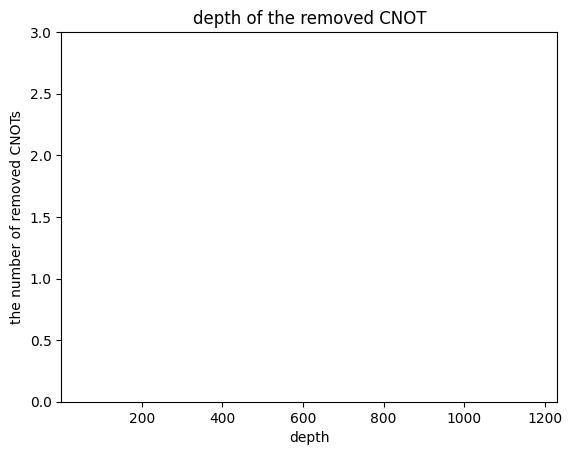

In [43]:
#######################################################
##### graph of depth of removed Toffoli into CNOT #####
#######################################################
##########################################
##### graph of depth of removed CNOT #####
##########################################
max_depth =  test.depth()
x = np.arange(max_depth + 1) # 1 to maximum depth
y = np.zeros(max_depth + 1) # initial count is zero
for n in depth_ls_tof:
    y[n] += 1


plt.bar(x, y)
plt.xlim(0.5, max_depth + 0.5)
plt.ylim(0, 3)
#plt.xticks([0, 5, 10], ['c0', 'c6', 'c10])
#plt.yticks([0, 5, 10], ['c0', 'c6', 'c10])
# plt.minorticks_on()
# plt.xscale('log')
# plt.yscale('log')
plt.title('depth of the removed CNOT')
plt.xlabel('depth')
plt.ylabel('the number of removed CNOTs')
# plt.grid()
#plt.legend()
#plt.savefig("figures/figure.pdf")
plt.show()

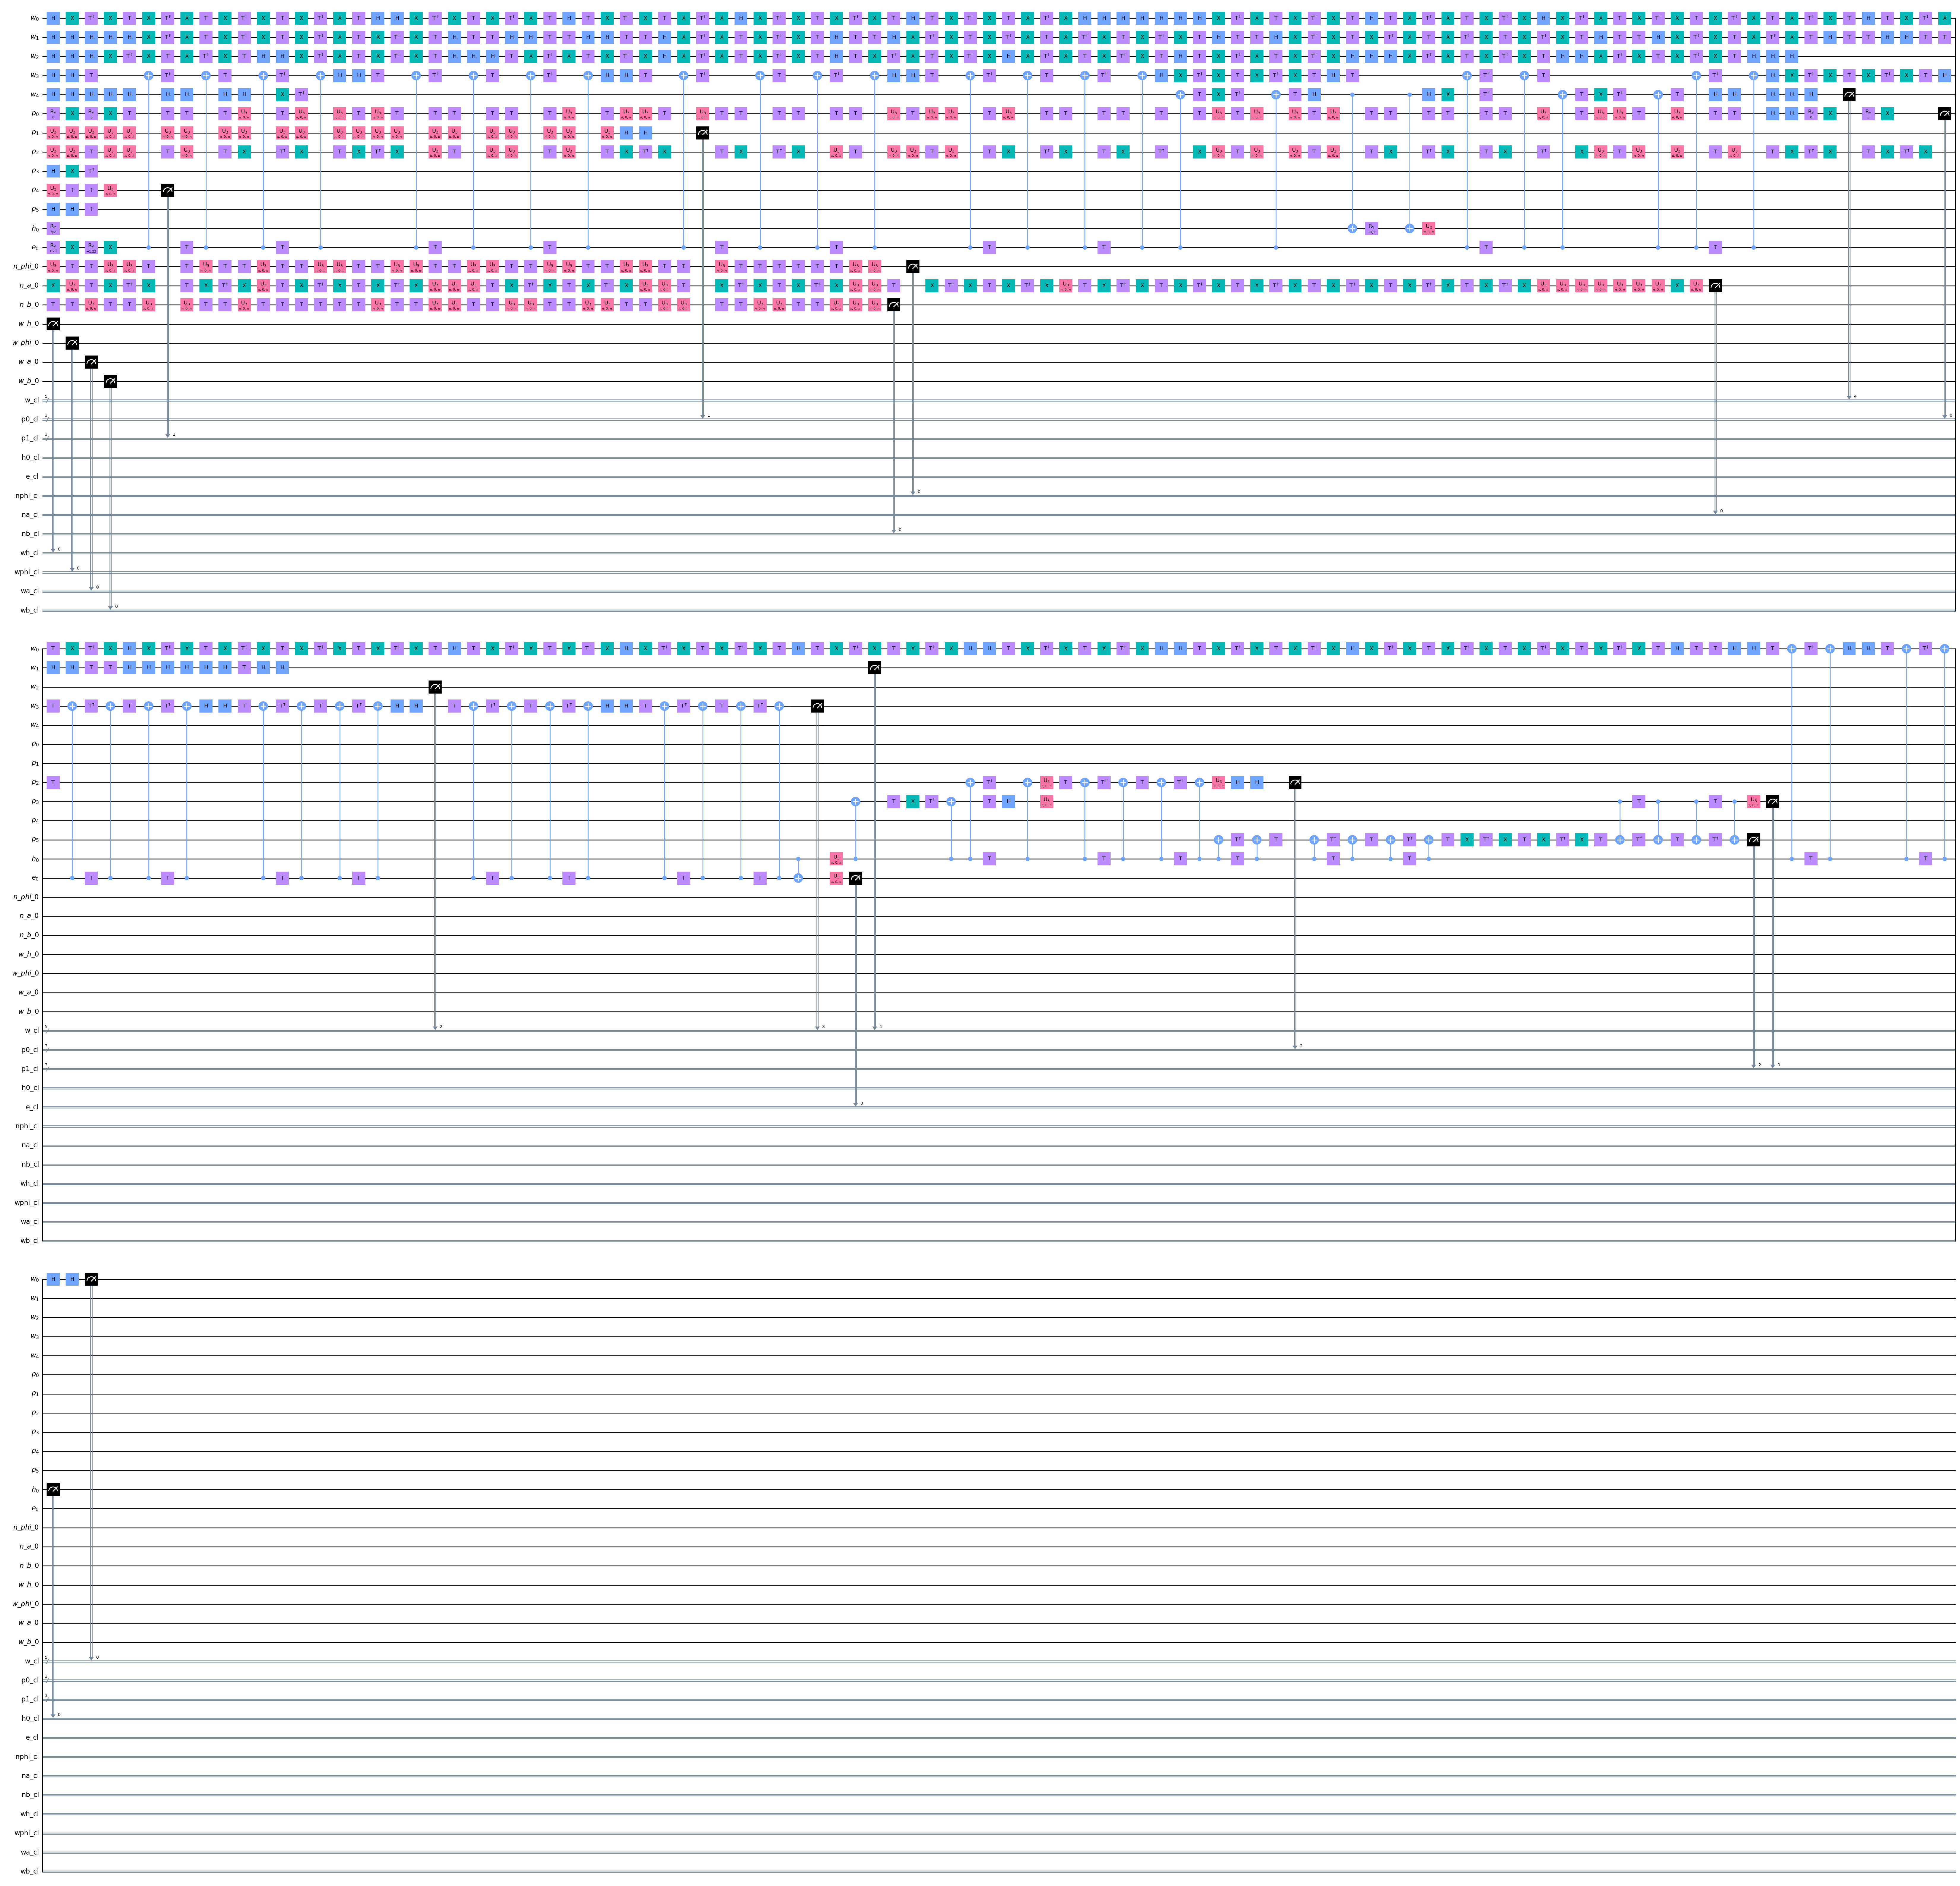

In [44]:
############################
##### draw the circuit #####
############################
aqcel_results_cc[0].draw('mpl', fold=100)

In [45]:
#####################################
##### count the number of CNOTs #####
#####################################
aqcel_results_cc[0].count_ops()

OrderedDict([('t', 289),
             ('x', 226),
             ('tdg', 140),
             ('h', 126),
             ('u3', 126),
             ('cx', 65),
             ('measure', 20),
             ('ry', 8)])

#### ④AQCEL circuit optimization decomposed

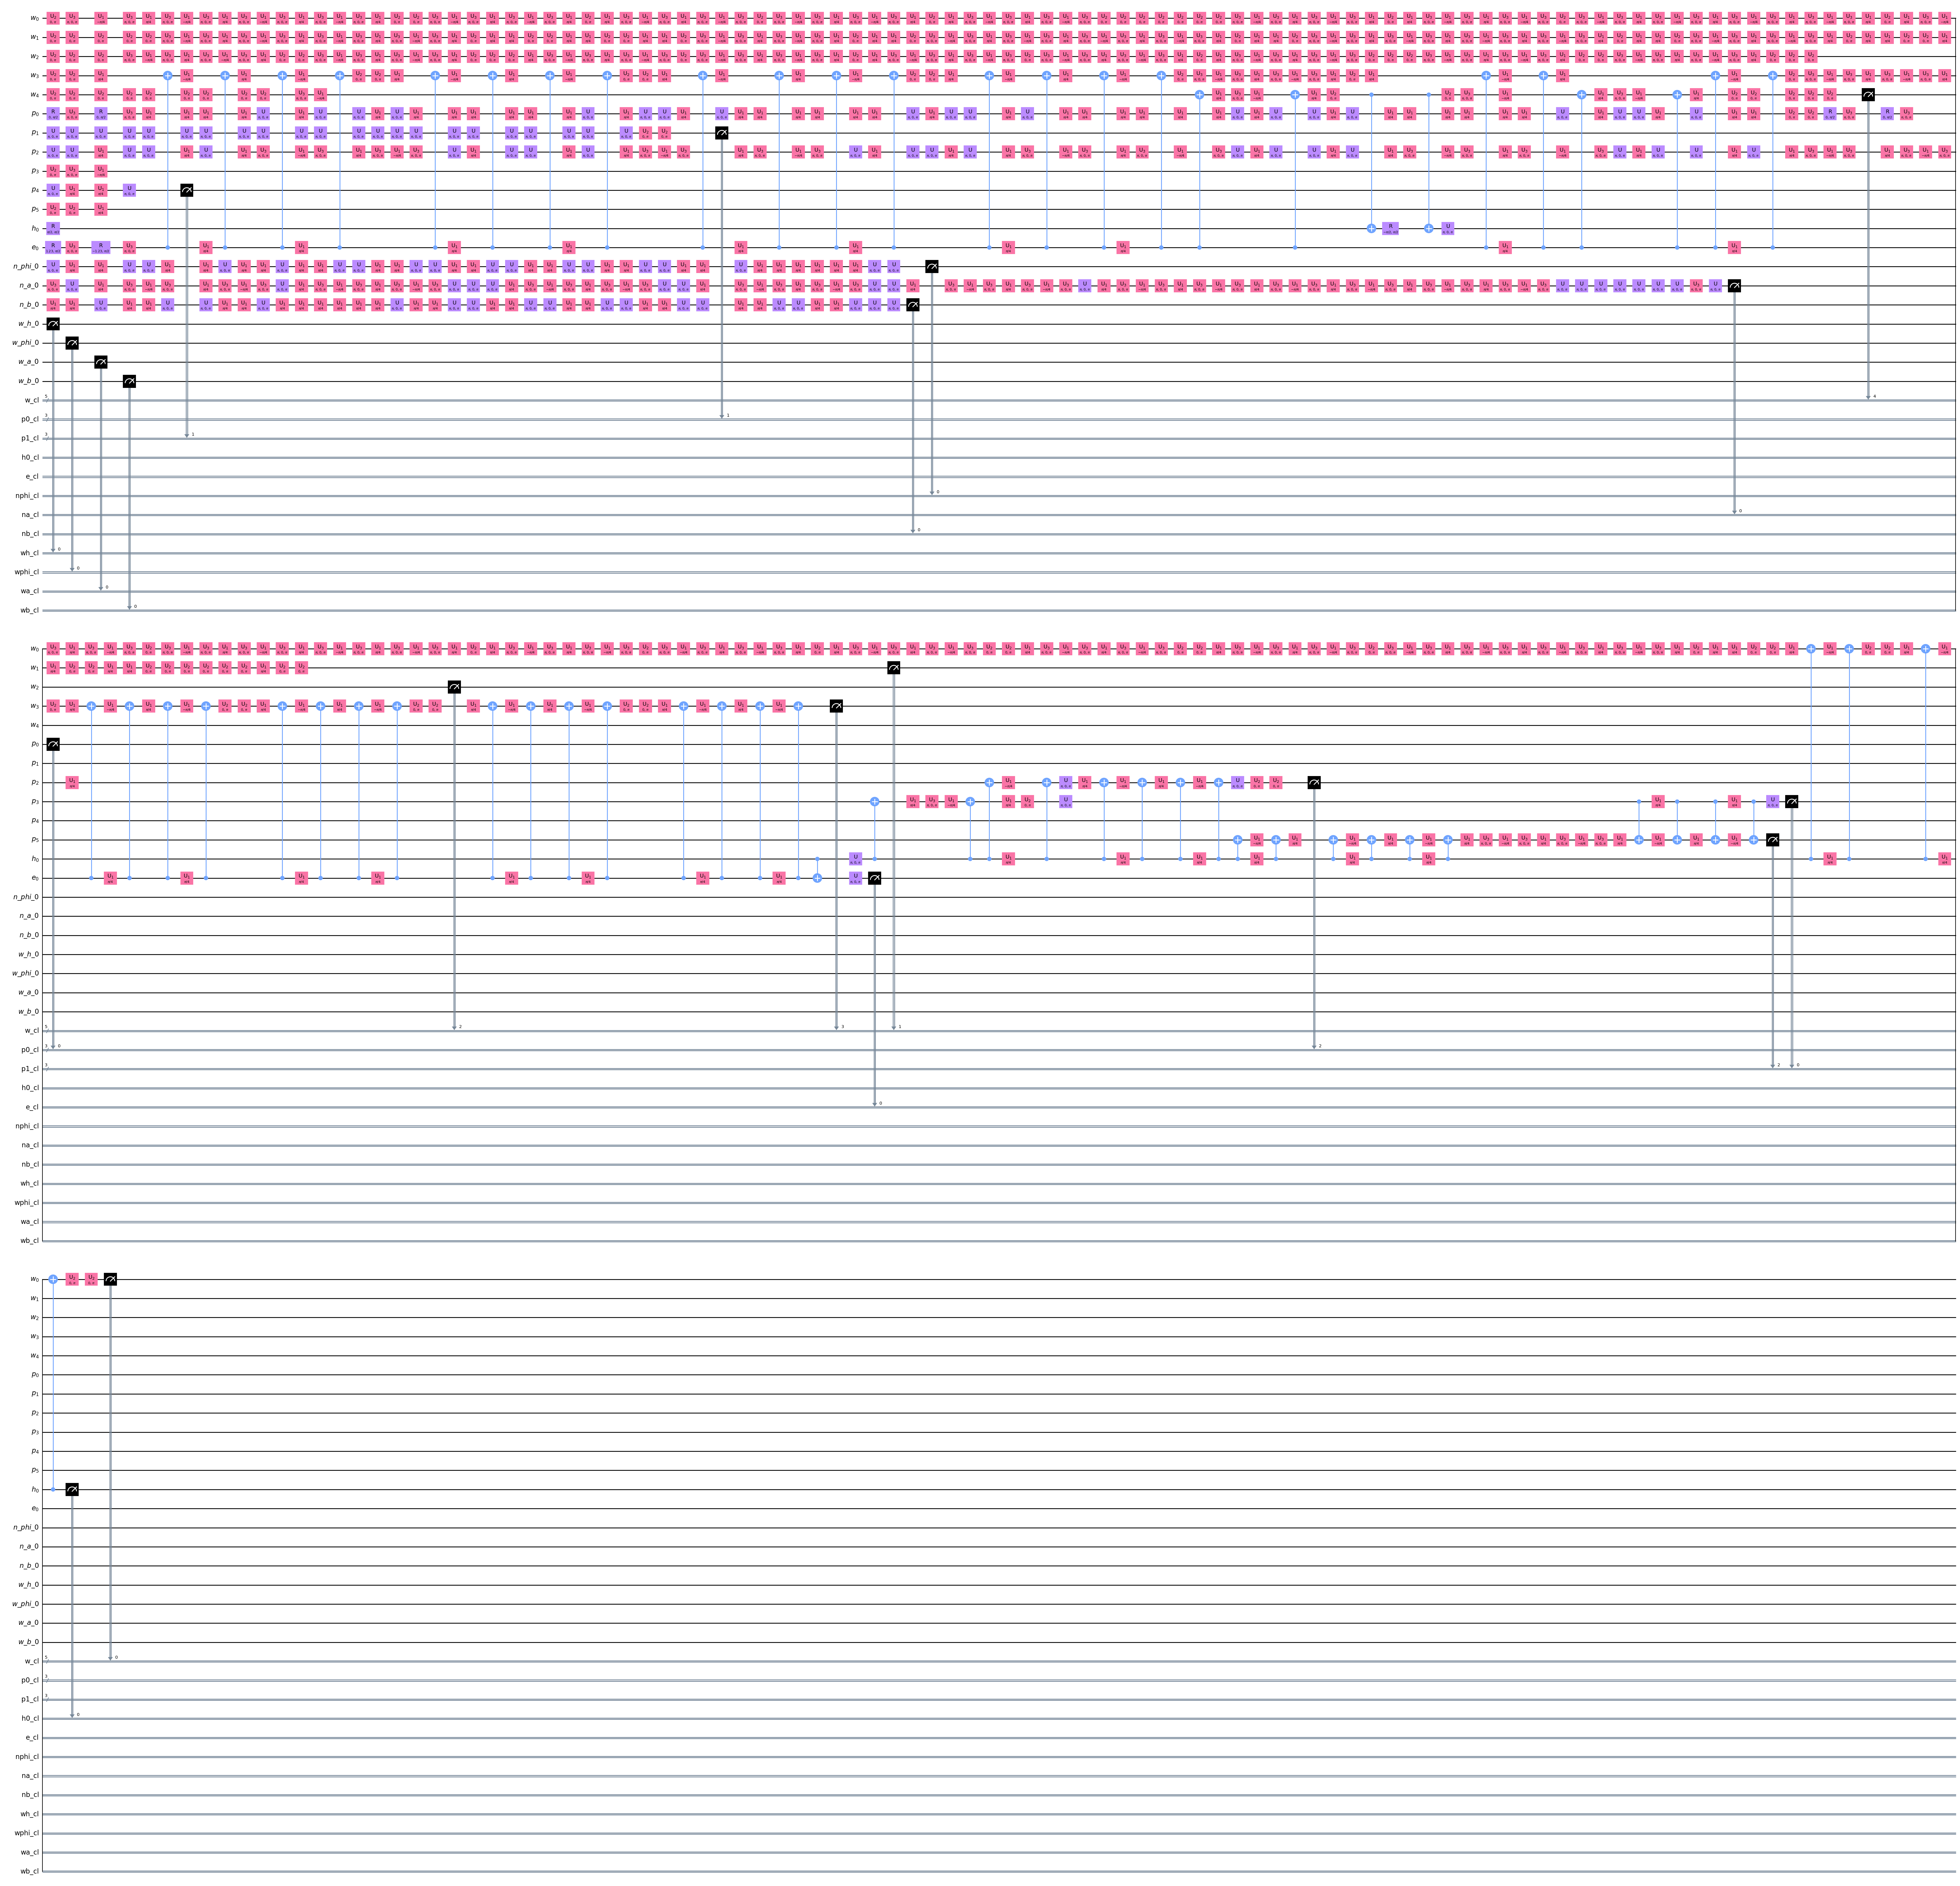

In [46]:
#################################
##### decompose the circuit #####
#################################
aqcel_results_cc_2 = aqcel_results_cc[0].decompose()
aqcel_results_cc_2.draw('mpl',fold=100)

In [47]:
#####################################
##### count the number of CNOTs #####
#####################################
aqcel_results_cc_2.count_ops()

OrderedDict([('u1', 429),
             ('u3', 226),
             ('u2', 126),
             ('u', 126),
             ('cx', 65),
             ('measure', 20),
             ('r', 8)])